In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import data. Use option names to list the column names to use.
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep='\s+',
                   names=['mpg','cyclinders','displacement','horsepower','weight','acceleration','model year','origin'
                         ,'car name'],index_col='car name')

In [4]:
data.head()

,mpg,cyclinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
# Note that horsepower is missing
data.describe()

,mpg,cyclinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Verify that all of the data is characterized properly and with no missing data
# Horsepower is an object. It should be int or float
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             398 non-null float64
cyclinders      398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


In [7]:
# Let's check horsepower in more detail.
data['horsepower']

car name
chevrolet chevelle malibu            130.0
buick skylark 320                    165.0
plymouth satellite                   150.0
amc rebel sst                        150.0
ford torino                          140.0
ford galaxie 500                     198.0
chevrolet impala                     220.0
plymouth fury iii                    215.0
pontiac catalina                     225.0
amc ambassador dpl                   190.0
dodge challenger se                  170.0
plymouth 'cuda 340                   160.0
chevrolet monte carlo                150.0
buick estate wagon (sw)              225.0
toyota corona mark ii                95.00
plymouth duster                      95.00
amc hornet                           97.00
ford maverick                        85.00
datsun pl510                         88.00
volkswagen 1131 deluxe sedan         46.00
peugeot 504                          87.00
audi 100 ls                          90.00
saab 99e                             95.00
bm

In [8]:
# One of the cars listed above had a ? for horsepower. Check if there is more.
data[data['horsepower']=='?']

,mpg,cyclinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford pinto,25.0,4,98.0,?,2046.0,19.0,71,1
ford maverick,21.0,6,200.0,?,2875.0,17.0,74,1
renault lecar deluxe,40.9,4,85.0,?,1835.0,17.3,80,2
ford mustang cobra,23.6,4,140.0,?,2905.0,14.3,80,1
renault 18i,34.5,4,100.0,?,2320.0,15.8,81,2
amc concord dl,23.0,4,151.0,?,3035.0,20.5,82,1


In [9]:
# replace ? used to highlight missing data with NaN 
# Use the option inplace=True to permantly change the dataset
data.replace('?',np.nan,inplace=True)

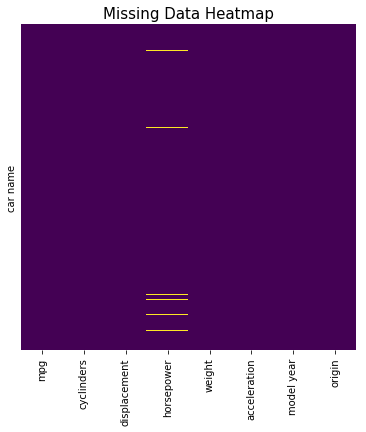

In [10]:
# Checking for missing data ( yellow blocks indicates attributes with missing data)
# Set yticklabels=False so that you don't plot column names
# Set cbar=False so that you don't draw a colorbar
# Set cmap=viridis which is matplotlib colormap name scheme from purple to blue to green to yellow
_=plt.figure(figsize=(6,6))
_=sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
_=plt.title('Missing Data Heatmap',fontsize=15)

In [11]:
from sklearn.preprocessing import Imputer

In [12]:
# All of the missing data is contained in the horsepower column so we will impute 
# the missing data using the mean of the column.
# Use option `axis=0` to impute along columns.
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(data['horsepower'].values.reshape(-1,1))
data['horsepower']= imputer.transform(data['horsepower'].values.reshape(-1,1))

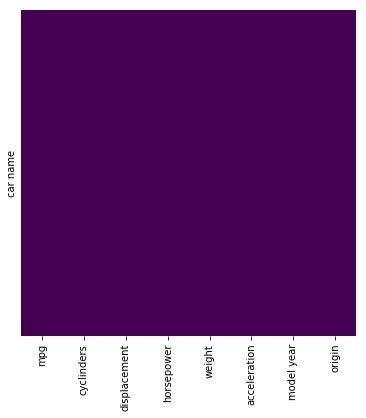

In [13]:
#Checking for missing data (yellow blocks indicates attributes with missing data)
_=plt.figure(figsize=(6,6))
_=sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

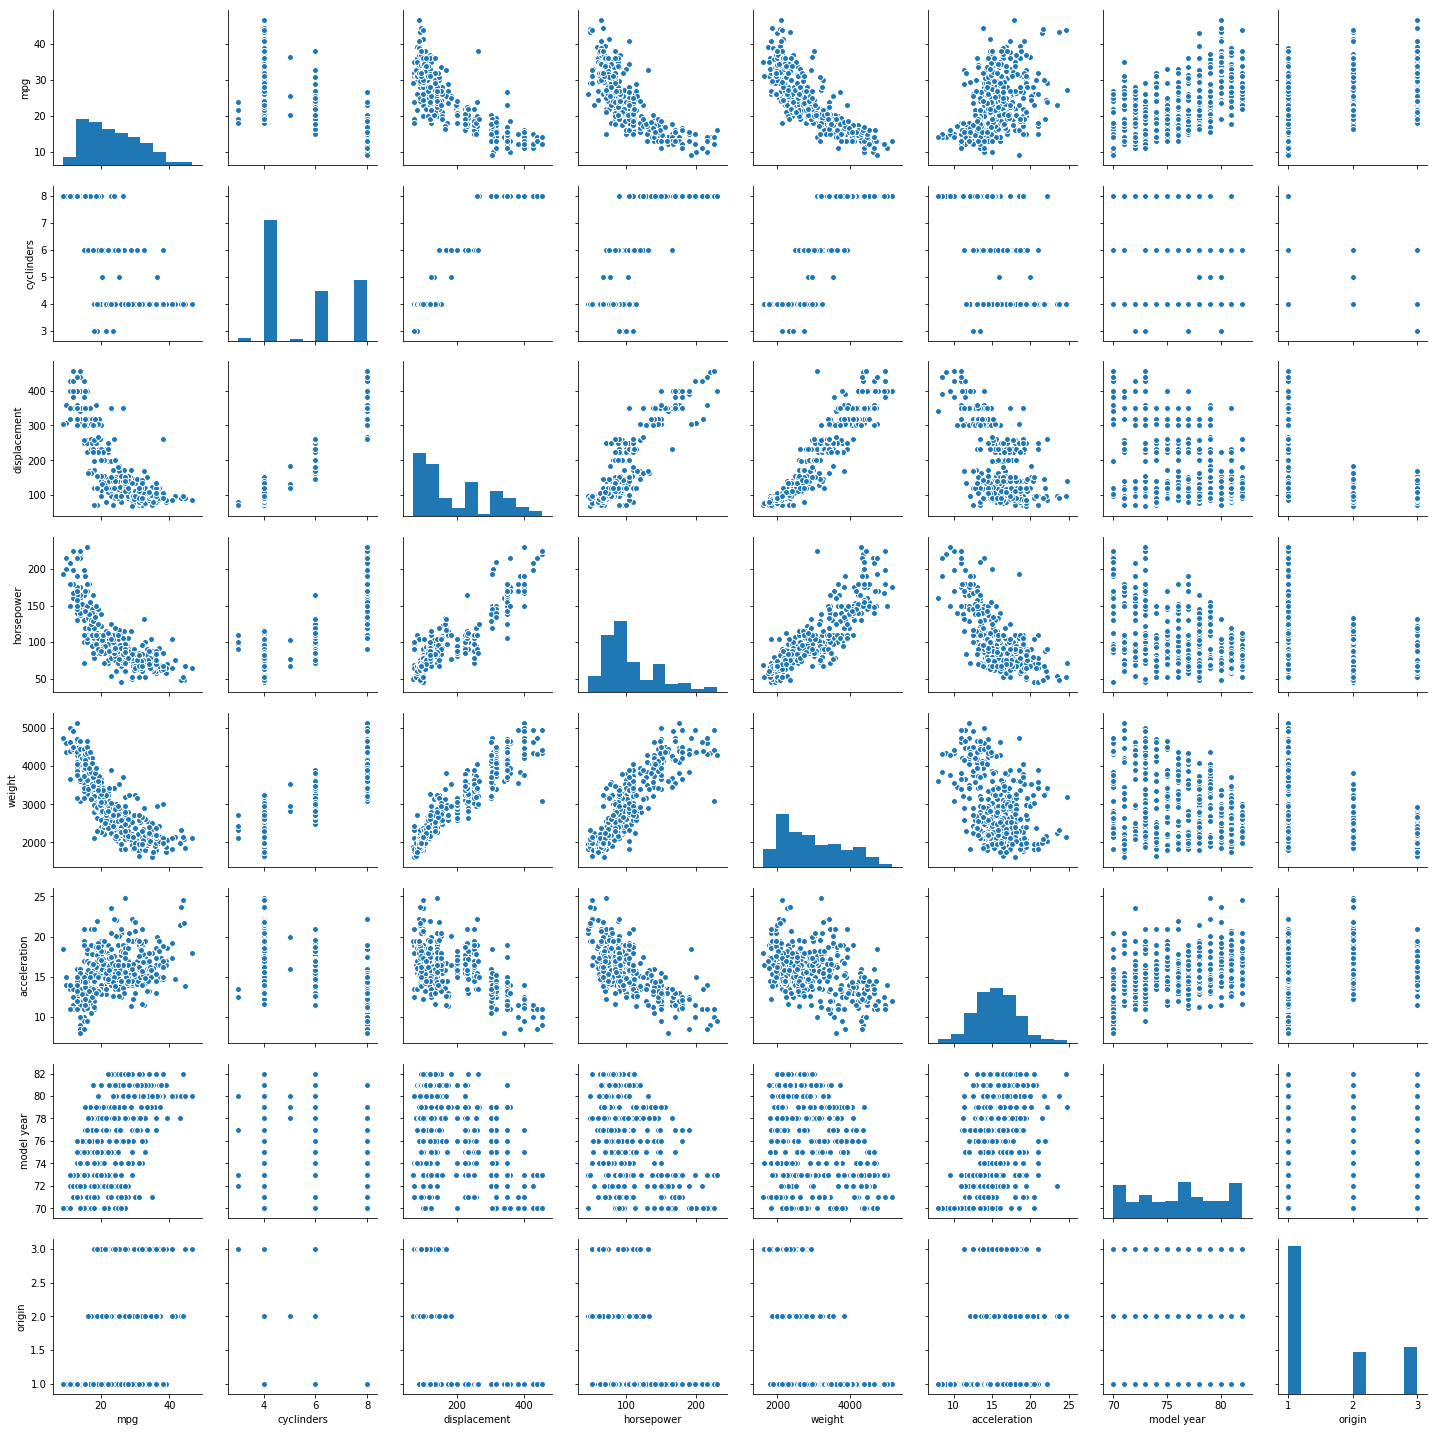

In [14]:
# Check to see how well the data correlates 
# (displacement and weight as well as horsepower and weight are highly correlated)
_=plt.figure(figsize=(6,6))
_=sns.pairplot(data,palette='viridis')

In [15]:
data.columns

Index(['mpg', 'cyclinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

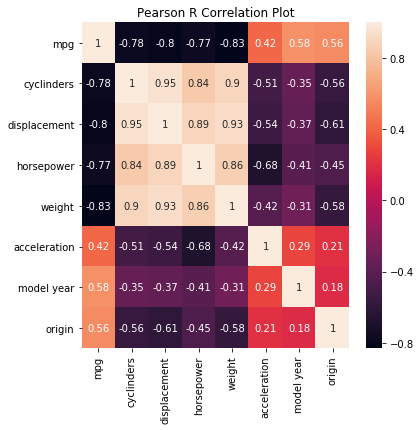

In [17]:
# How well are the features correlated?
# Set annot=True to write the data value in each cell.
_= plt.figure(figsize=(6,6))
_=sns.heatmap(data.corr(),annot=True)
_=plt.title('Pearson R Correlation Plot')

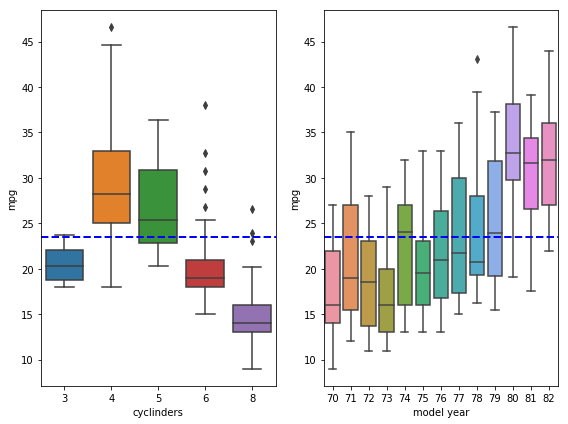

In [19]:
# Check for outliers
_ = plt.figure(figsize=(8,6))
_ = plt.subplot(1,2,1)
_ = sns.boxplot(x='cyclinders',y='mpg',data=data)
plt.axhline(data.mpg.mean(),color='b',linestyle='dashed',linewidth=2)

_ = plt.subplot(1,2,2)
sns.boxplot(x='model year',y='mpg',data=data)
plt.axhline(data.mpg.mean(),color='b',linestyle='dashed',linewidth=2)
# Use tight_layout() to automatically adjust subplot parameters to give specified padding.
plt.tight_layout()


## Model Selection

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# data needs to be scaled
data.head()

,mpg,cyclinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [22]:
# Assign data to new variables
X= data.iloc[:,1:9].values
y= data.iloc[:,0]

In [23]:
X= StandardScaler().fit_transform(X)

In [24]:
names = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']

In [25]:
# Split the data for testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/Users/jongyeoblee/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [27]:
linear_reg = LinearRegression()
cv_results_lin = cross_val_score(linear_reg,X_train,y_train,cv=5)

In [28]:
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
predict = linear_reg.predict(X_test)

In [30]:
print(np.mean(cv_results_lin))

0.8090403627761871


In [31]:
linear_reg.score(X_test,y_test)

0.8166486776392329

In [32]:
cv_results_lin

array([0.79826037, 0.76452298, 0.8002461 , 0.85258424, 0.82958812])

In [33]:
#Intercept
print("Intercept: %f" %linear_reg.intercept_)

# Coefficients
print("Coefficients: %s" %str(linear_reg.coef_))

# Model Performance
print("R^2: %f" %(linear_reg.score(X_test, y_test)))

Intercept: 23.360414
Coefficients: [-0.51279883  2.14923569 -0.78008652 -5.50349018  0.53308118  2.75330051
  1.16588172]
R^2: 0.816649


## Lasso

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
cv_results_las = cross_val_score(lasso,X_train,y_train,cv=5)

In [35]:
print(np.mean(cv_results_las))

0.8071369598435154


In [36]:
lasso.score(X_test,y_test)

0.8172685325077625

In [37]:
predict_lasso = lasso.predict(X_test)

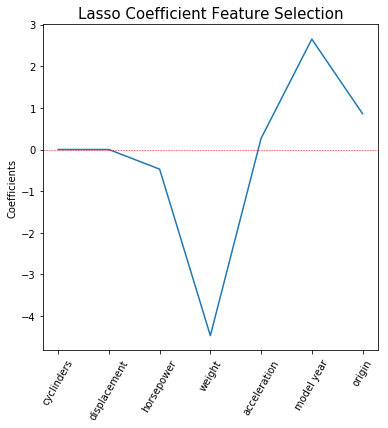

In [38]:
names = data.drop('mpg',axis=1).columns

lasso_coef = lasso.fit(X_train,y_train).coef_

_= plt.figure(figsize=(6,6))
_= plt.plot(range(len(names)),lasso_coef)
_=plt.axhline(0,color='r',linestyle='dashed',linewidth=0.5)

# On the x-axis label the names of the variables in a 60 degree angle 
_= plt.xticks(range(len(names)),names,rotation=60)

_=plt.ylabel('Coefficients')
_=plt.title('Lasso Coefficient Feature Selection',fontsize=15)

In [39]:
#Intercept
print("Intercept: %f" %lasso.intercept_)

# Coefficients
print("Coefficients: %s" %str(lasso.coef_))

# Model Performance
print("R^2: %f" %(lasso.score(X_test,y_test)))

Intercept: 23.358067
Coefficients: [-0.          0.         -0.4718609  -4.46831878  0.26666549  2.65037639
  0.8602601 ]
R^2: 0.817269


## Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1)
elastic.fit(X_train,y_train)
cv_results_elastic = cross_val_score(elastic,X_train,y_train,cv=5)

In [41]:
print(np.mean(cv_results_elastic))

0.8051436324564503


In [42]:
elastic.score(X_test,y_test)

0.8093716344614286

In [43]:
predict_elastic = elastic.predict(X_test)

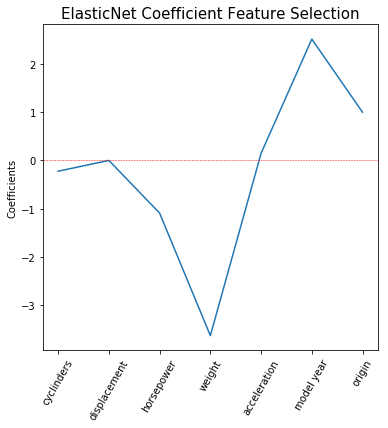

In [44]:
names = data.drop('mpg',axis=1).columns

elastic_coef = elastic.fit(X_train,y_train).coef_

_= plt.figure(figsize=(6,6))
_= plt.plot(range(len(names)),elastic_coef)
_=plt.axhline(0,color='r',linestyle='dashed',linewidth=0.5)

# On the x-axis label the names of the variables in a 60 degree angle 
_= plt.xticks(range(len(names)),names,rotation=60)

_=plt.ylabel('Coefficients')
_=plt.title('ElasticNet Coefficient Feature Selection',fontsize=15)

In [45]:
#Intercept
print("Intercept: %f" %elastic.intercept_)

# Coefficients
print("Coefficients: %s" %str(elastic.coef_))

# Model Performance
print("R^2: %f" %(elastic.score(X_test, y_test)))

Intercept: 23.353529
Coefficients: [-0.22302882 -0.         -1.0916729  -3.63017593  0.14695517  2.51392783
  0.99936527]
R^2: 0.809372


## Ridge

In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
cv_results_ridge = cross_val_score(ridge,X_train,y_train,cv=5)

In [47]:
print(np.mean(cv_results_ridge))

0.8091220532331003


In [48]:
ridge.score(X_test,y_test)

0.8166287109984747

In [49]:
predict_ridge = ridge.predict(X_test)

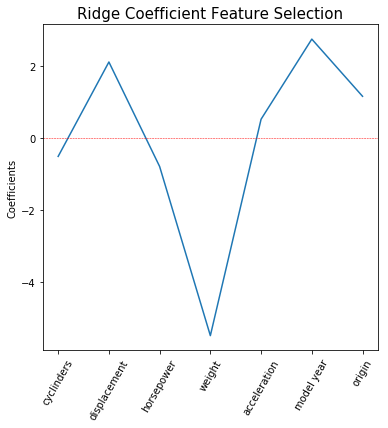

In [50]:
names = data.drop('mpg',axis=1).columns

ridge = Ridge(alpha=0.1)
ridge_coef = ridge.fit(X_train,y_train).coef_

_= plt.figure(figsize=(6,6))
_= plt.plot(range(len(names)),ridge_coef)
_=plt.axhline(0,color='r',linestyle='dashed',linewidth=0.5)

# On the x-axis label the names of the variables in a 60 degree angle 
_= plt.xticks(range(len(names)),names,rotation=60)

_=plt.ylabel('Coefficients')
_=plt.title('Ridge Coefficient Feature Selection',fontsize=15)

In [51]:
#Intercept
print("Intercept: %f" %ridge.intercept_)

# Coefficients
print("Coefficients: %s" %str(ridge.coef_))

# Model Performance
print("R^2: %f" %(ridge.score(X_test, y_test)))

Intercept: 23.360235
Coefficients: [-0.50414274  2.11591273 -0.78431468 -5.47915822  0.52778305  2.75127458
  1.16388939]
R^2: 0.816629


## Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
# Gradient boosting is robust to over-fitting - higher n results in better performance.
GB= GradientBoostingRegressor(n_estimators=400)

In [54]:
GB.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [55]:
predict_GB = GB.predict(X_test)

In [56]:
cv_results_gb = cross_val_score(GB,X_train,y_train,cv=5)

In [57]:
print(np.mean(cv_results_gb))

0.8503251943297758


In [58]:
GB.score(X_test,y_test)

0.8653258766551126

In [59]:
names = ['cylinders','displacement','horsepower','weight','acceleration','model year','origin']

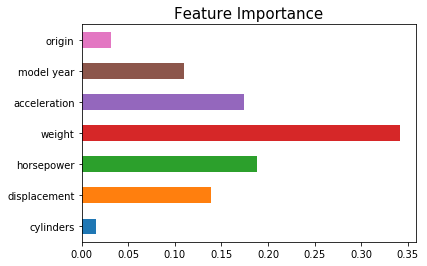

In [61]:
# Feature importance (also known as the Gini importance) determines 
# which variable is the most important
gb = pd.Series(GB.feature_importances_,index=names)
gb.plot.barh()
_=plt.title('Feature Importance',fontsize=15)

In [62]:
gb

cylinders       0.015191
displacement    0.138918
horsepower      0.188446
weight          0.342058
acceleration    0.174406
model year      0.109891
origin          0.031091
dtype: float64

In [63]:
_=plt.style.use('ggplot')
_=plt.figure(figsize=(6,6))

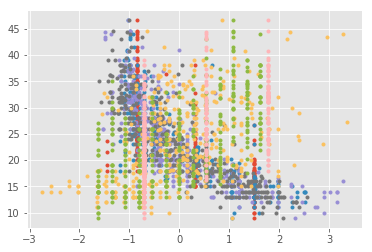

In [63]:
_=plt.plot(X,y,marker='.',linestyle='none')